In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2025-04-25 22:19:08.397650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-25 22:19:08.413902: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-25 22:19:08.418894: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-25 22:19:08.432163: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-25 22:19:09.117902: W tensorflow/compiler/tf2

In [2]:
# load the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train=X_train/255
X_test=X_test/255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 109s 1us/step


In [3]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
X_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)


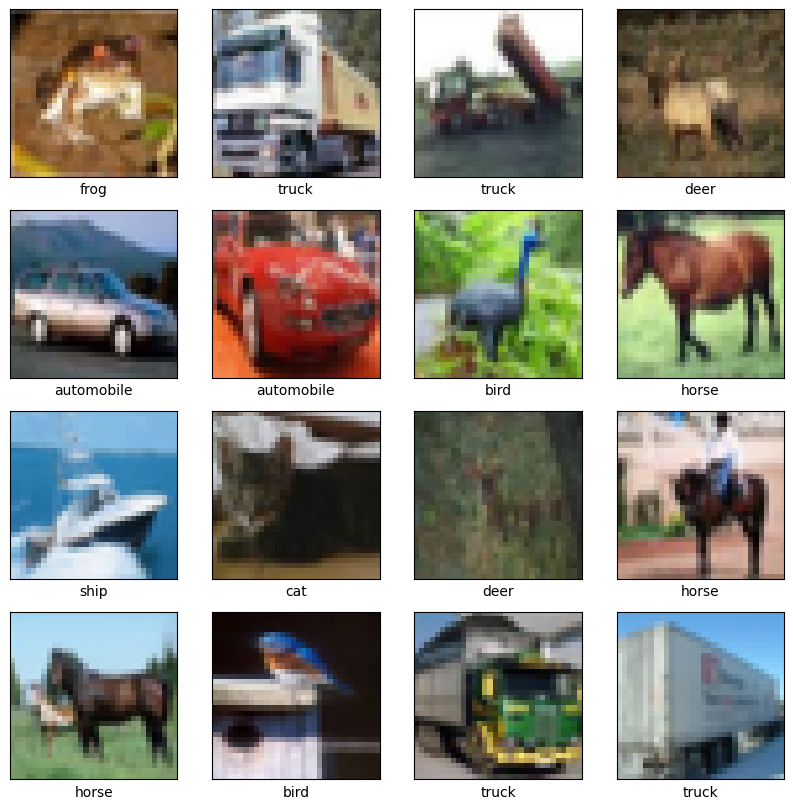

In [4]:
#Drawing Few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
# now, let's define CNN based multi class classifier
model = models.Sequential()
model.add(layers.Input((32, 32, 3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu')) #, input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

I0000 00:00:1745599863.670215  211534 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-25 22:21:03.717080: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,149,002 (4.38 MB)

 Trainable params: 1,149,002 (4.38 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import time #To measure the execution time
start = time.time()

model.compile(optimizer=tf.keras.optimizers.Adam(), #SGD(learning_rate=0.1, momentum=0.1), #0.01
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), #True),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=768, epochs=30, validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/30


2025-04-25 22:22:14.154008: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 233ms/step - accuracy: 0.2644 - loss: 2.0039 - val_accuracy: 0.4197 - val_loss: 1.5928
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 237ms/step - accuracy: 0.4535 - loss: 1.5052 - val_accuracy: 0.4915 - val_loss: 1.3989
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.5232 - loss: 1.3393 - val_accuracy: 0.5559 - val_loss: 1.2548
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 249ms/step - accuracy: 0.5647 - loss: 1.2322 - val_accuracy: 0.5330 - val_loss: 1.3590
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.5734 - loss: 1.2142 - val_accuracy: 0.5783 - val_loss: 1.1596
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - accuracy: 0.6211 - loss: 1.0760 - val_accuracy: 0.6130 - val_loss: 1.1009
Epoch 7/30
 8/66 ━━━━━━━━━━━━━━━━━━━━ 13s 227ms/step - accuracy: 0.6243 - loss: 1.0768

KeyboardInterrupt: 

In [7]:
import numpy as np
def predict(model, data):
    probs = model.predict(data)
    label = np.argmax(probs, axis=1)
    return [class_names[_] for _ in label]


__let's test the model on some the test samples__

In [8]:
sample = np.random.permutation(len(X_test))[:16]
inputs = X_test[sample]
true_labels = y_test[sample]
labels = predict(model, inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


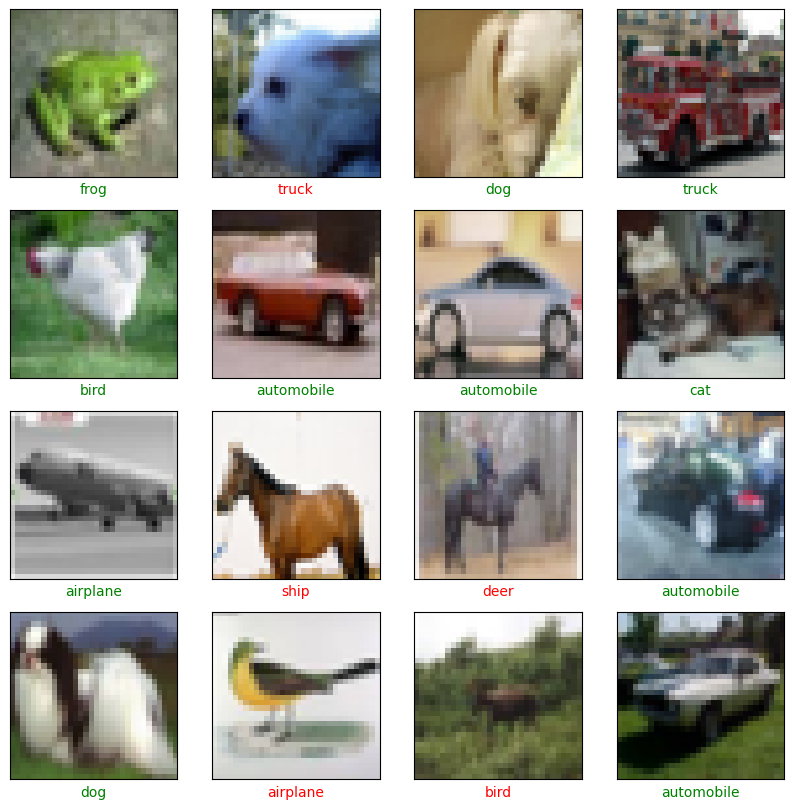

Accuracy: 68 %


In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
t_correct = 0
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(inputs[i], cmap=plt.cm.binary)
    correctness = class_names[true_labels[i][0]] == labels[i]
    if correctness: t_correct += 1
    color = "green" if correctness else "red"
    name = f"{labels[i]}"
    plt.xlabel(name, color=color)
    plt.xticks([])
    plt.yticks([])
plt.show()
print("Accuracy:", int(100*t_correct/16), '%')